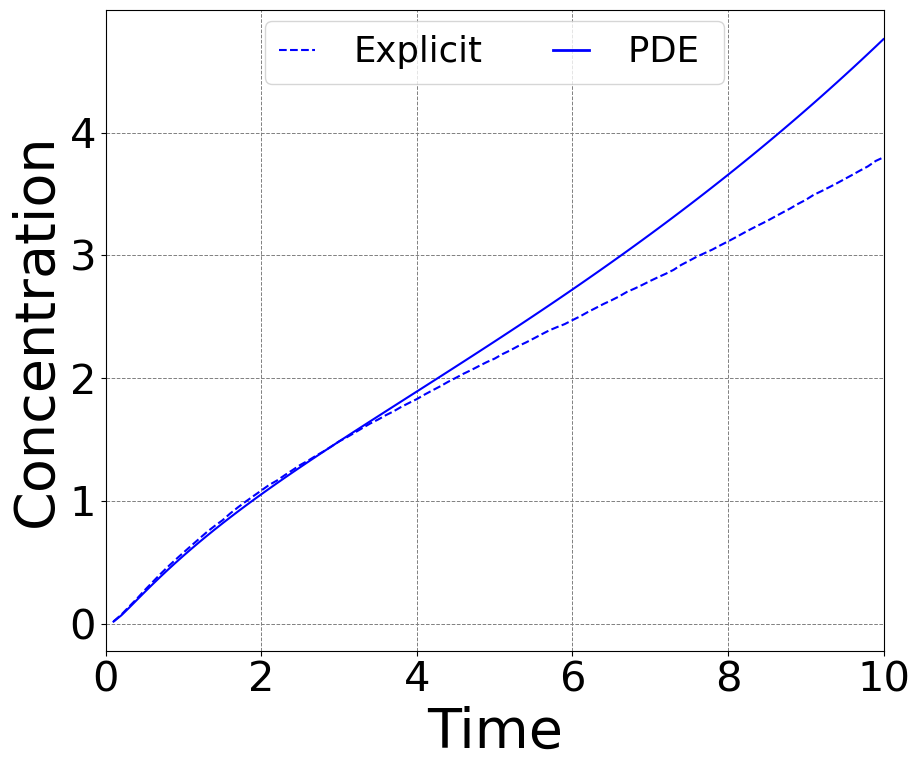

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Fri Jun 14 19:06:51 2024

@author: mkost
"""

from __future__ import division
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import seaborn as sns
from Parameters_Proliferation import *
from matplotlib.lines import Line2D

ts=0.1
maxtime=deltat*(timesteps-1)
timesteps_cut = int(deltat * (timesteps-1) / ts)


DiscretePreyAverageExplicit = np.load('./Solutions/ExplicitProliferationAverage.npy')

ReferencePrey = np.load('./Solutions/FDSolution_Proliferation.npy')


'''Plotting'''

def HybridPlot(Average, Reference, bd):
    '''
    Creates hybrid plots, where the right side corresponds to the FD solution
    and the left side to the mean-field concentration obtained from the coupling.
    Average=mean-field concentration
    Concentration=FD solution
    bd=location of the boundary
    '''

    listH = []  # list of Hybrid solutions
    listR = []  # list of Reference solutions
    
    
    Hmean=np.zeros(timesteps_cut)
    Cmean=np.zeros(timesteps_cut)
    if len(Average)!=timesteps_cut:
        print('error')
        
    for t in range(timesteps_cut):
        Average_t = np.transpose(Average[t])  # get reservoir

        # create matrix fromt he particle discretization
        Particle = np.zeros(shape=(l_coupling, int(l_coupling/2)))
        
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2) ):
                Particle[i, j] = Average_t[i, j]
        # average
        Hmean[t]=np.mean(Particle)
    
    constant=int(ts/deltat)
    k=0
    for t in range(timesteps_cut):
        
        Ref_t=Reference[(t+1)*constant]
        
        Concentration_t= np.zeros(shape=(l_coupling, int(l_coupling/2)))
        for i in range(l_coupling):
            for j in range(int(l_coupling / 2)):
                 Concentration_t[i, j  ]=Ref_t[i,j]
        
        Cmean[k]=np.mean(Concentration_t)
        k=k+1

    return Hmean, Cmean 


#%% Plot for Preys

prey_mean, RefPrey = HybridPlot(DiscretePreyAverageExplicit, ReferencePrey, l_coupling)

Times=np.arange(ts, maxtime+ts, ts)
# plot data
plt.figure(figsize=(9.3, 7.8))
plt.plot(Times, prey_mean, '--', markersize=10,markevery=1,  color='blue')

plt.plot(Times, RefPrey, color='blue')

#plt.ylim(0,2)
plt.xlim(0, 10)

xticks = [0, 2,4,6,8,10] # Adjust according to your data limits
plt.xticks(xticks, fontsize=30)

#yticks = [0, 0.25, 0.5, 0.75, 1, 1.25, 1.5] # Adjust according to your data limits
#plt.yticks(yticks, fontsize=30)
# Set x-axis ticks to be integers only

plt.xticks(fontsize=30)

# Set y-axis ticks to be integers only

plt.yticks(fontsize=30)


plt.xlabel('Time', fontsize=40)
plt.ylabel('Concentration', fontsize=40)

# Create custom legend handles for dots and lines
prey_dot = Line2D([], [], color='blue', linestyle='--', markersize=15, 
                  label='Explicit')

prey_line = Line2D([], [], color='blue', linestyle='-', linewidth=2, label='PDE ')



# Combine all custom legend handles
handles = [prey_dot, prey_line]
plt.legend(handles=handles, fontsize=25.5, handlelength=1, handletextpad=1.1, 
           loc='upper center', bbox_to_anchor=(0.5, 1.01), ncol=2)
plt.grid(which='both', linestyle='--', linewidth=0.7, color='gray')  # Customize as needed

plt.tight_layout()



plt.savefig('./Plots/Proliferation/DiffusionTau.png')
